# Laboratório - Questão de Oferta e Demanda

#### Algoritmo para resolução de questões de oferta e demanda. Desenvolvido pelo monitor Gabriel Ouverney com colaboração do Prof. Ivan Carneiro. Maio de 2020.


Num determinado mercado quando o preço de venda é de R\\$ 80,00 a sua quantidade
ofertada é igual a 12,00 unidades e quando o preço de venda é de R\\$ 180,00 a sua
quantidade ofertada é igual a 22 unidades.
Nesse mesmo mercado quando o preço de venda é de R\\$ 130,00 a sua quantidade
demandada é igual a 24 unidades e quando o preço de venda é de R\\$ 150 a sua
quantidade demandada é igual a 16 unidades.

**Atenção:** Você pode usar esse algoritmo para resolver qualquer questão desse tipo apenas trocando os valores dentro dos arrays OFERTA e DEMANDA. Os pontos tem que estar necessariamente dispostos na ordem \[quantidade,preço\].

In [1]:
import numpy as np
import matplotlib.pyplot as plt

OFERTA = np.array(([12,80],[22,180]), dtype = float)
DEMANDA = np.array(([24,130],[16,150]), dtype = float)

a) Com base nos dados acima construa as funções de oferta e de demanda.

In [2]:
def coef(X): #Função para determinar os coeficientes da equação da reta onde x é função de y
    m = (X[1,1]-X[0,1])/(X[1,0]-X[0,0]) #Coeficiente angular
    n = X[0,1] - m*X[0,0] #Coeficiente linear
    return(m, n)

mo, no = coef(OFERTA)
md, nd = coef(DEMANDA)

def Oferta(x): #Reta da oferta: y está em função de x
    y = mo*x + no
    return(y)
    
def Demanda(x): #Reta da demanda: y está em função de x
    y = md*x + nd
    return(y)

def alt(y,m,n): #Função alternativa: reta com x em função de y
    x = y/m - n/m
    return(x) 

print("\n Equação da oferta: y=",mo,"*x +", no,
      "\n Equação da Demanda: y=",md,"*x +", nd)


 Equação da oferta: y= 10.0 *x + -40.0 
 Equação da Demanda: y= -2.5 *x + 190.0


b) Encontre o ponto de equilíbrio.

In [3]:
def pontoeq(mo, no, md, nd): #Função para encontrar o ponto de equilíbrio
    x  = (nd-no)/(mo-md)
    y = mo*x + no
    return(x, y)

x_eq, y_eq = pontoeq(mo, no, md, nd)

print("Ponto de equilíbrio: ", x_eq, y_eq)

Ponto de equilíbrio:  18.4 144.0


c) Construa o gráfico.

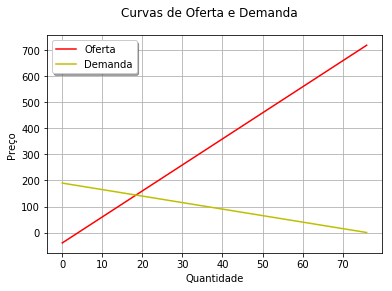

In [4]:
x = np.linspace(0,alt(0,md,nd),100) #constrói o eixo x

fig = plt.figure()
plt.plot(x,Oferta(x),'r',label='Oferta')
plt.plot(x,Demanda(x),'y',label='Demanda')
plt.xlabel('Quantidade')
plt.ylabel('Preço')
plt.legend(shadow=True,loc='best')
fig.suptitle('Curvas de Oferta e Demanda')
plt.grid()
plt.show()

d) Calcule o excedente do produtor e do consumidor e evidencie-os no gráfico.

In [5]:
def ExCons(x_eq,y_eq):
    return (x_eq*(Demanda(0)-y_eq)/2)

def ExProd(x_eq,y_eq,mo,no):
    return(alt(0,mo,no)*y_eq + (y_eq*(x_eq-alt(0,mo,no)))/2)

print("O excedente do consumidor é", ExCons(x_eq,y_eq),
     "\nO excedente do produtor é", ExProd(x_eq,y_eq,mo,no))

O excedente do consumidor é 423.2 
O excedente do produtor é 1612.8


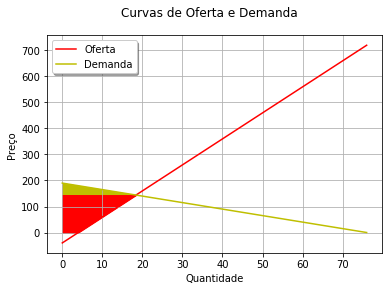

In [6]:
x = np.linspace(0,alt(0,md,nd),100)

fig = plt.figure()
plt.plot(x,Oferta(x),'r',label='Oferta')
plt.plot(x,Demanda(x),'y',label='Demanda')
plt.xlabel('Quantidade')
plt.ylabel('Preço')
plt.legend(shadow=True, loc = 'best')
fig.suptitle('Curvas de Oferta e Demanda')

sectionA = np.linspace(0,x_eq,100) #Excedente do consumidor
sectionB = np.linspace(alt(0,mo,no),x_eq,100) #Excedente do produtor - triângulo
sectionC = np.linspace(0,alt(0,mo,no),100)#Excedente do produtor - retângulo
 
#Funções para preencher os excedentes
plt.fill_between(sectionA,y_eq,Demanda(sectionA),color = 'y') 
plt.fill_between(sectionB,y_eq,Oferta(sectionB),color = 'r')
plt.fill_between(sectionC,y_eq,0,color = 'r')

plt.grid()
plt.show()